In [1]:
from getpass import getpass
from huggingface_hub import login
from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline, LocalAgent


In [2]:
# from dotenv import load_dotenv
# import os
# load_dotenv()
# HUGGINGFACEHUB_API_TOKEN=os.getenv("HUGGINGFACEHUB_API_TOKEN")
# login(HUGGINGFACEHUB_API_TOKEN)

In [3]:
# !pip install git+https://github.com/huggingface/transformers.git

In [4]:
model_name = "TheBloke/CollectiveCognition-v1.1-Mistral-7B-GPTQ"
model = AutoModelForCausalLM.from_pretrained(model_name, 
                                             device_map="auto",
                                             )
# model=model.to("cuda")
tokenizer = AutoTokenizer.from_pretrained(model_name,
                                          device_map="auto"
                                          )
pipe = pipeline(task="text-generation", model=model, tokenizer=tokenizer)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [5]:
# Starcoder
# agent = HfAgent("https://api-inference.huggingface.co/models/bigcode/starcoder")
# StarcoderBase
agent = LocalAgent(model=model,tokenizer=tokenizer)
# OpenAssistant
# agent = HfAgent(url_endpoint="https://api-inference.huggingface.co/models/OpenAssistant/oasst-sft-4-pythia-12b-epoch-3.5")

In [7]:
res = agent.run("Summarize the content from the following website - https://huggingface.co/docs/transformers/transformers_agents")

/home/ryan/github/generative-ai/venv/lib/python3.10/site-packages/transformers/generation/utils.py:1421: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use and modify the model generation configuration (see https://huggingface.co/docs/transformers/generation_strategies#default-text-generation-configuration )
  warnings.warn(


==Explanation from the agent==
I will use the following tools: `text_downloader` to download the text from the website, then `summarizer` to create a summary.


==Code generated by the agent==
text = text_downloader(url="https://huggingface.co/docs/transformers/transformers_agents")
summary = summarizer(text)


==Result==


In [8]:
res

"Transformers is a training tool for TensorFlow. It allows you to build models and train them. It's free and available to download. There are a number of tutorials and resources to get you started. There's also a lot of information on how to contribute to it."

In [9]:
agent.toolbox

{'document_qa': PreTool(task='document-question-answering', description='This is a tool that answers a question about an document (pdf). It takes an input named `document` which should be the document containing the information, as well as a `question` that is the question about the document. It returns a text that contains the answer to the question.', repo_id=None),
 'image_captioner': PreTool(task='image-captioning', description='This is a tool that generates a description of an image. It takes an input named `image` which should be the image to caption, and returns a text that contains the description in English.', repo_id=None),
 'image_qa': PreTool(task='image-question-answering', description='This is a tool that answers a question about an image. It takes an input named `image` which should be the image containing the information, as well as a `question` which should be the question in English. It returns a text that is the answer to the question.', repo_id=None),
 'image_segmen

In [13]:
picture = agent.run("Create a picture of a corgi running on the beach")

==Explanation from the agent==
I will use the following tool: `image_generator` to create a picture of a corgi running on the beach.


==Code generated by the agent==
image = image_generator(prompt="corgi running on the beach")


==Result==


  0%|          | 0/25 [00:00<?, ?it/s]

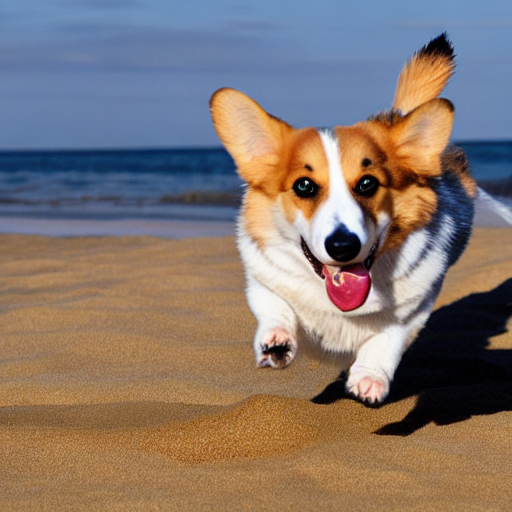

In [14]:
picture

In [17]:
updated_picture = agent.run("Transform the image in `picture` to put a hat on the corgi", picture=picture)

==Explanation from the agent==
I will use the following tool: `image_transformer` to transform the image.


==Code generated by the agent==
transformed_image = image_transformer(image=picture, prompt="a hat on the corgi")


==Result==


  0%|          | 0/50 [00:00<?, ?it/s]

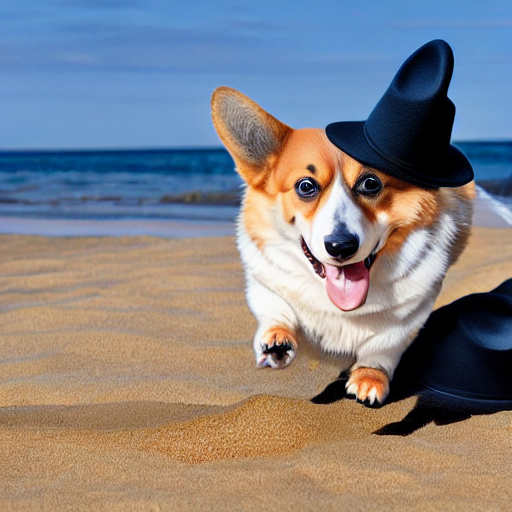

In [18]:
updated_picture

In [19]:
from transformers import Tool


class MyAdditionTool(Tool):
    name = "addition_tool"
    description = """This is a tool that can be used to do addition and sum two numbers together"""

    inputs = ["text"]
    outputs = ["text"]

    def __call__(self, num_1:int, num_2:int):
        return num_1 + num_2

In [20]:
tool = MyAdditionTool()

In [21]:
agent.toolbox["addition_tool"] = tool

In [22]:
agent.toolbox

{'document_qa': PreTool(task='document-question-answering', description='This is a tool that answers a question about an document (pdf). It takes an input named `document` which should be the document containing the information, as well as a `question` that is the question about the document. It returns a text that contains the answer to the question.', repo_id=None),
 'image_captioner': PreTool(task='image-captioning', description='This is a tool that generates a description of an image. It takes an input named `image` which should be the image to caption, and returns a text that contains the description in English.', repo_id=None),
 'image_qa': PreTool(task='image-question-answering', description='This is a tool that answers a question about an image. It takes an input named `image` which should be the image containing the information, as well as a `question` which should be the question in English. It returns a text that is the answer to the question.', repo_id=None),
 'image_segmen

In [23]:
agent.run("What is the sum of 2 and 5?")

==Explanation from the agent==
I will use the following tool: `addition_tool` to perform the addition.


==Code generated by the agent==
print(f"The sum is {addition_tool(2, 5)}")


==Result==
The sum is 7
